In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../..")

print('Current location: ', os.getcwd())

Current location:  /Users/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [4]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_group_models_box_plot_per_test_set, create_bar_plot_for_model_selection

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'


## Initialize Configs

In [5]:
EXPERIMENT_NAME = 'out_of_domain_uncertainty_poor_income'
DB_COLLECTION_NAME = 'out_of_domain_uncertainty'
DATASET_NAME = 'Folktables_2018_Income'
EXPERIMENT_SESSION_UUID = 'b74b8eef-38ac-4bb5-a970-96e8798f3122'
SENSITIVE_ATTRS = ['SEX', 'RAC1P', 'SEX&RAC1P']
MODEL_NAMES = ['RandomForestClassifier']

In [6]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [7]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [8]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(76, 33)

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
0,Accuracy,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-22 02:05:42.451,b74b8eef-38ac-4bb5-a970-96e8798f3122,Exp_iter_1,...,0.799030,1.000000,0.000000,0.851897,1.000000,0.000000,0.768000,1.000000,0.000000,0.808900
1,Accuracy,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,1,OK,2023-10-22 02:05:42.462,b74b8eef-38ac-4bb5-a970-96e8798f3122,Exp_iter_1,...,0.751442,1.000000,0.000000,0.762681,1.000000,0.000000,0.747397,1.000000,0.000000,0.754900
2,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-22 03:02:19.320,b74b8eef-38ac-4bb5-a970-96e8798f3122,Exp_iter_1,...,0.806812,1.000000,0.000000,0.854154,1.000000,0.000000,0.779707,1.000000,0.000000,0.816000
3,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-22 03:02:19.331,b74b8eef-38ac-4bb5-a970-96e8798f3122,Exp_iter_1,...,0.750865,1.000000,0.000000,0.760847,1.000000,0.000000,0.750147,1.000000,0.000000,0.755400
4,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-22 02:05:42.451,b74b8eef-38ac-4bb5-a970-96e8798f3122,Exp_iter_1,...,0.592640,0.538549,0.807699,0.547781,0.502897,0.805952,0.617249,0.559814,0.807377,0.583383
5,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,1,OK,2023-10-22 02:05:42.462,b74b8eef-38ac-4bb5-a970-96e8798f3122,Exp_iter_1,...,0.635825,0.578597,0.808838,0.612618,0.554972,0.797878,0.640886,0.582713,0.813007,0.627009
6,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-22 03:02:19.320,b74b8eef-38ac-4bb5-a970-96e8798f3122,Exp_iter_1,...,0.623746,0.570993,0.844058,0.574736,0.529994,0.836770,0.644819,0.588979,0.842460,0.610653
7,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-22 03:02:19.331,b74b8eef-38ac-4bb5-a970-96e8798f3122,Exp_iter_1,...,0.636115,0.579071,0.808041,0.612156,0.554624,0.795187,0.640771,0.583909,0.811492,0.626724
8,F1,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-22 02:05:42.451,b74b8eef-38ac-4bb5-a970-96e8798f3122,Exp_iter_1,...,0.620528,1.000000,0.000000,0.590703,1.000000,0.000000,0.631775,1.000000,0.000000,0.617264
9,F1,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,1,OK,2023-10-22 02:05:42.462,b74b8eef-38ac-4bb5-a970-96e8798f3122,Exp_iter_1,...,0.701414,1.000000,0.000000,0.654405,1.000000,0.000000,0.722606,1.000000,0.000000,0.693893


In [10]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [11]:
exp_subgroup_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
0,Accuracy,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-22 02:05:42.451,b74b8eef-38ac-4bb5-a970-96e8798f3122,Exp_iter_1,...,0.799030,1.000000,0.000000,0.851897,1.000000,0.000000,0.768000,1.000000,0.000000,0.808900
4,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-22 02:05:42.451,b74b8eef-38ac-4bb5-a970-96e8798f3122,Exp_iter_1,...,0.592640,0.538549,0.807699,0.547781,0.502897,0.805952,0.617249,0.559814,0.807377,0.583383
8,F1,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-22 02:05:42.451,b74b8eef-38ac-4bb5-a970-96e8798f3122,Exp_iter_1,...,0.620528,1.000000,0.000000,0.590703,1.000000,0.000000,0.631775,1.000000,0.000000,0.617264
12,FNR,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-22 02:05:42.451,b74b8eef-38ac-4bb5-a970-96e8798f3122,Exp_iter_1,...,0.485886,0.000000,1.000000,0.497104,0.000000,1.000000,0.480652,0.000000,1.000000,0.486333
16,FPR,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-22 02:05:42.451,b74b8eef-38ac-4bb5-a970-96e8798f3122,Exp_iter_1,...,0.067131,0.000000,1.000000,0.053920,0.000000,1.000000,0.077507,0.000000,1.000000,0.064571
20,IQR,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-22 02:05:42.451,b74b8eef-38ac-4bb5-a970-96e8798f3122,Exp_iter_1,...,0.066098,0.059345,0.092949,0.060325,0.054547,0.093560,0.069517,0.062493,0.092771,0.065036
24,Jitter,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-22 02:05:42.451,b74b8eef-38ac-4bb5-a970-96e8798f3122,Exp_iter_1,...,0.064040,0.045654,0.137139,0.050488,0.034175,0.144319,0.070910,0.052128,0.133086,0.060954
28,Label_Stability,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-22 02:05:42.451,b74b8eef-38ac-4bb5-a970-96e8798f3122,Exp_iter_1,...,0.908506,0.935641,0.800617,0.927764,0.952083,0.787881,0.899081,0.926570,0.808082,0.913064
32,Mean,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-22 02:05:42.451,b74b8eef-38ac-4bb5-a970-96e8798f3122,Exp_iter_1,...,0.725033,0.746924,0.637995,0.773057,0.798969,0.624005,0.695747,0.711502,0.643591,0.733435
36,Overall_Uncertainty,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-22 02:05:42.451,b74b8eef-38ac-4bb5-a970-96e8798f3122,Exp_iter_1,...,0.605674,0.550364,0.825582,0.559747,0.513789,0.824103,0.630958,0.572287,0.825183,0.596243


In [12]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

In [13]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head(20)

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,-0.016453,-0.042147,-0.008090,RandomForestClassifier,Exp_iter_1,0.7,0
1,Equalized_Odds_FPR,-0.023587,-0.012579,-0.018527,RandomForestClassifier,Exp_iter_1,0.7,0
2,Equalized_Odds_FNR,0.016453,0.042147,0.008090,RandomForestClassifier,Exp_iter_1,0.7,0
3,Disparate_Impact,1.090995,1.060042,1.201112,RandomForestClassifier,Exp_iter_1,0.7,0
4,Statistical_Parity_Difference,0.058609,0.039555,0.132135,RandomForestClassifier,Exp_iter_1,0.7,0
5,Accuracy_Parity,0.083897,0.054290,0.087113,RandomForestClassifier,Exp_iter_1,0.7,0
6,Label_Stability_Ratio,1.031903,1.030874,1.044284,RandomForestClassifier,Exp_iter_1,0.7,0
7,IQR_Parity,-0.009193,-0.005945,-0.009376,RandomForestClassifier,Exp_iter_1,0.7,0
8,Std_Parity,-0.006392,-0.004363,-0.006698,RandomForestClassifier,Exp_iter_1,0.7,0
9,Std_Ratio,0.871894,0.908534,0.859108,RandomForestClassifier,Exp_iter_1,0.7,0


In [14]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head()

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,-0.016453,-0.042147,-0.008090,RandomForestClassifier,Exp_iter_1,0.7,0
1,Equalized_Odds_FPR,-0.023587,-0.012579,-0.018527,RandomForestClassifier,Exp_iter_1,0.7,0
2,Equalized_Odds_FNR,0.016453,0.042147,0.008090,RandomForestClassifier,Exp_iter_1,0.7,0
3,Disparate_Impact,1.090995,1.060042,1.201112,RandomForestClassifier,Exp_iter_1,0.7,0
4,Statistical_Parity_Difference,0.058609,0.039555,0.132135,RandomForestClassifier,Exp_iter_1,0.7,0


## Figure 1. Subgroup boxplots.

In [15]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [16]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 1200x600 with 0 Axes>

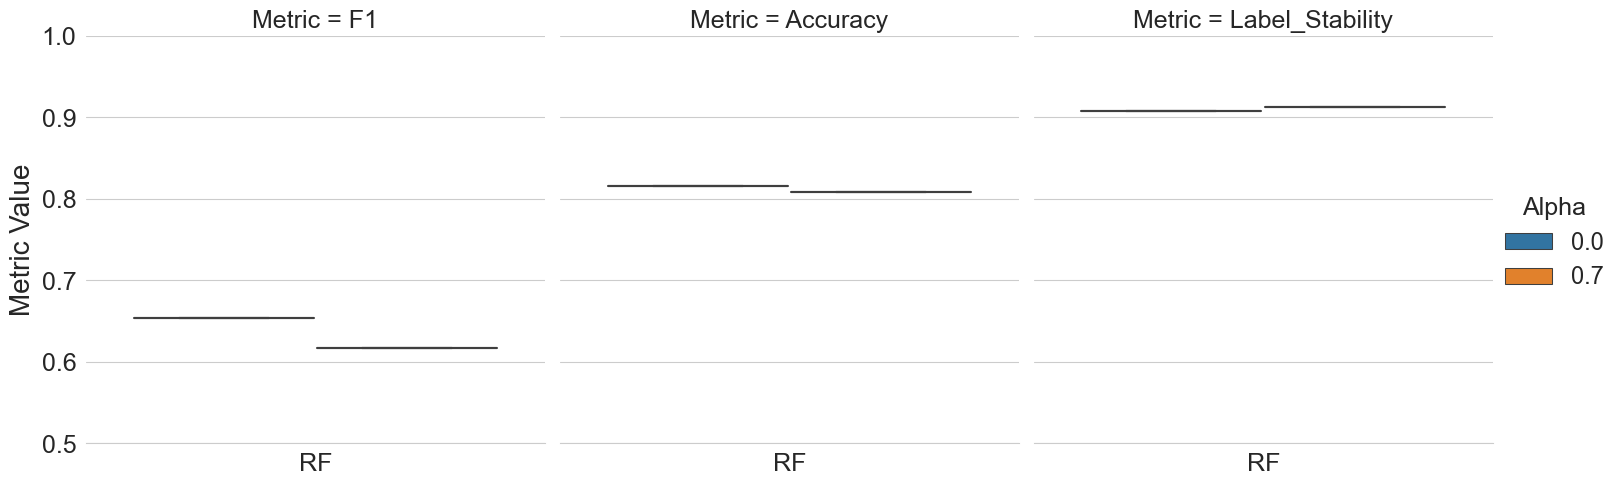

In [17]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.5, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

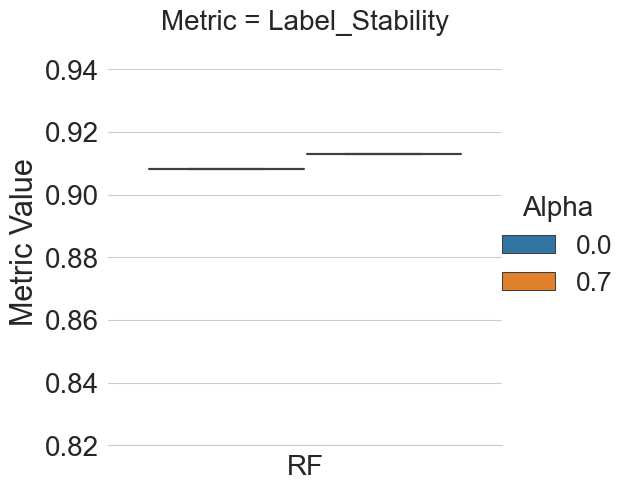

In [18]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.82, 0.95),
                                           metric_names=['Label_Stability'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 1200x600 with 0 Axes>

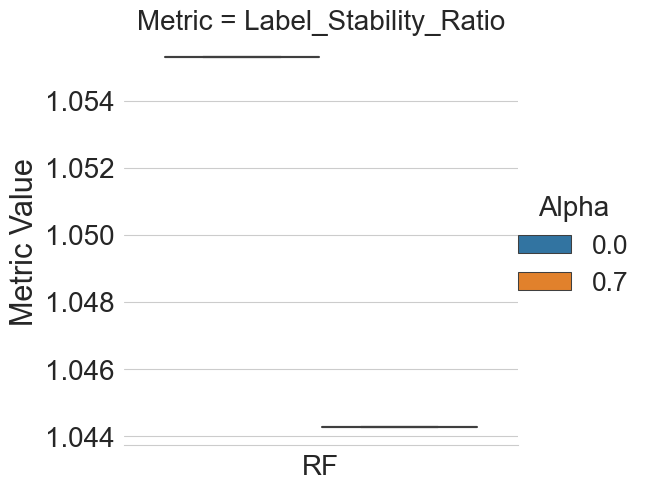

In [19]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='SEX&RAC1P',
                                           metric_names=['Label_Stability_Ratio'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

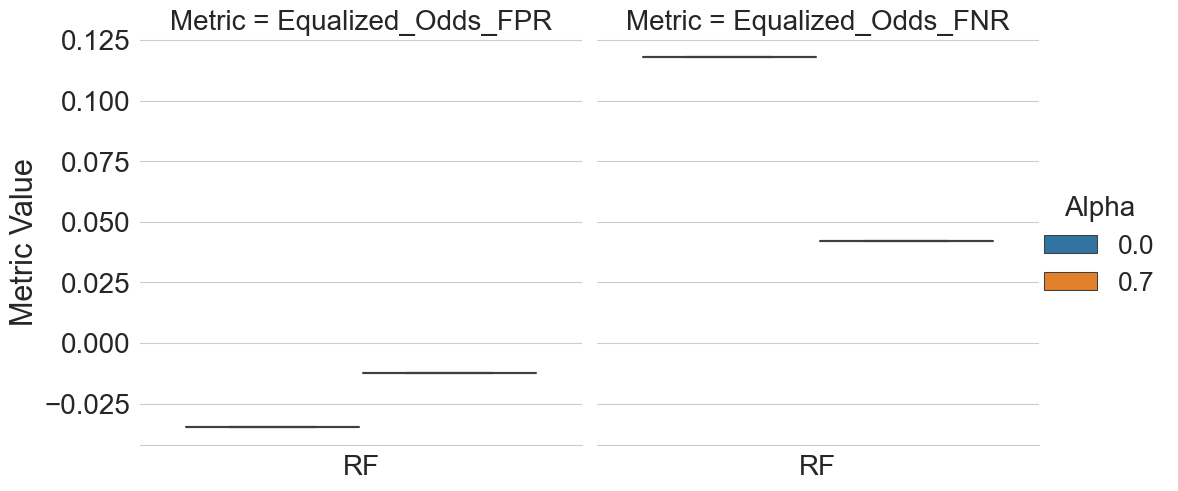

In [20]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='RAC1P',
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                           vals_to_replace=vals_to_replace)

## Figure 5. Out-of-domain boxplots.

In [21]:
new_vals_to_replace = vals_to_replace
new_vals_to_replace['Test_Set_Index'] = {
    0: 'Poor set',
    1: 'Rich set',
}

<Figure size 1200x600 with 0 Axes>

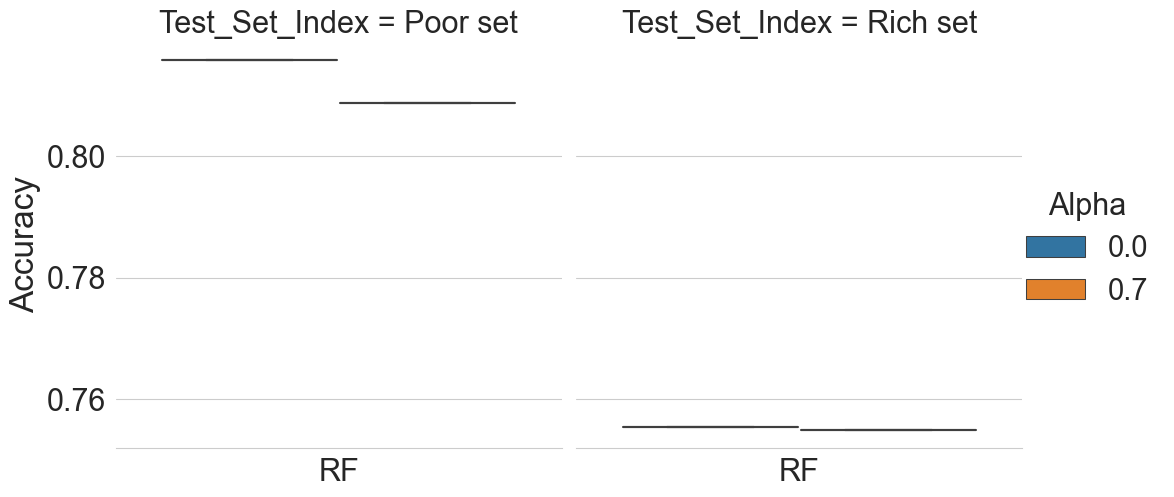

In [22]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Accuracy',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

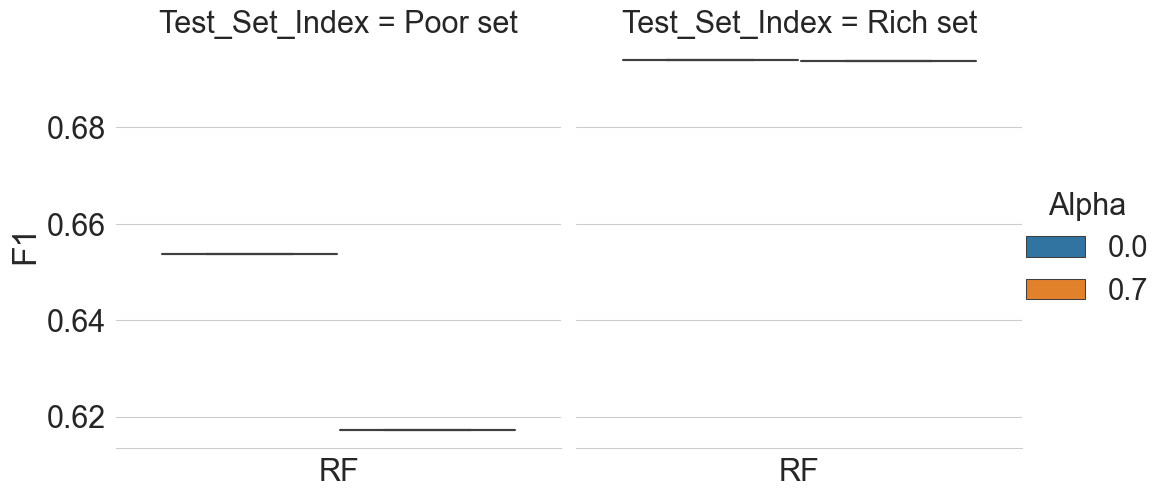

In [23]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='F1',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

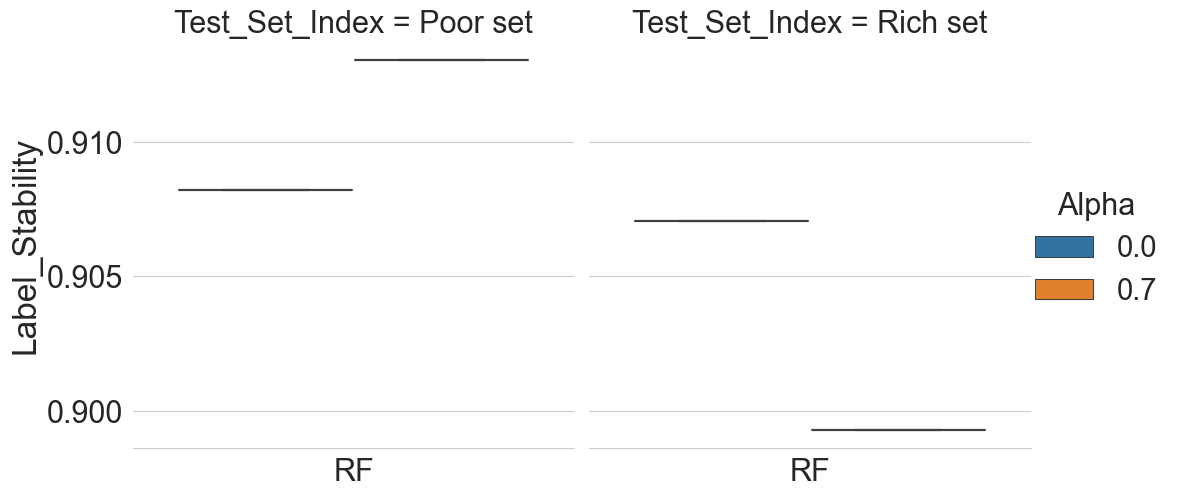

In [24]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Label_Stability',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

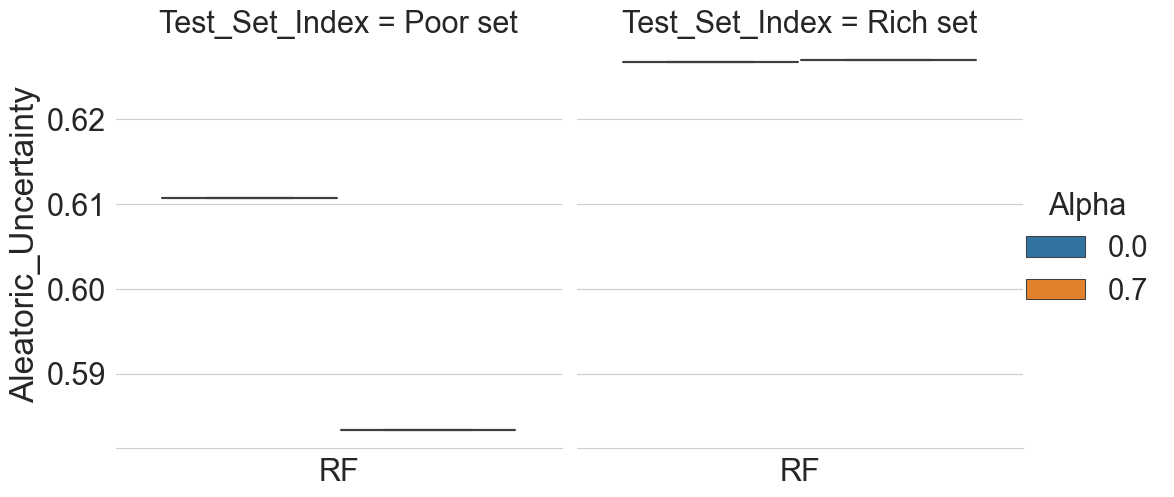

In [25]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Aleatoric_Uncertainty',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

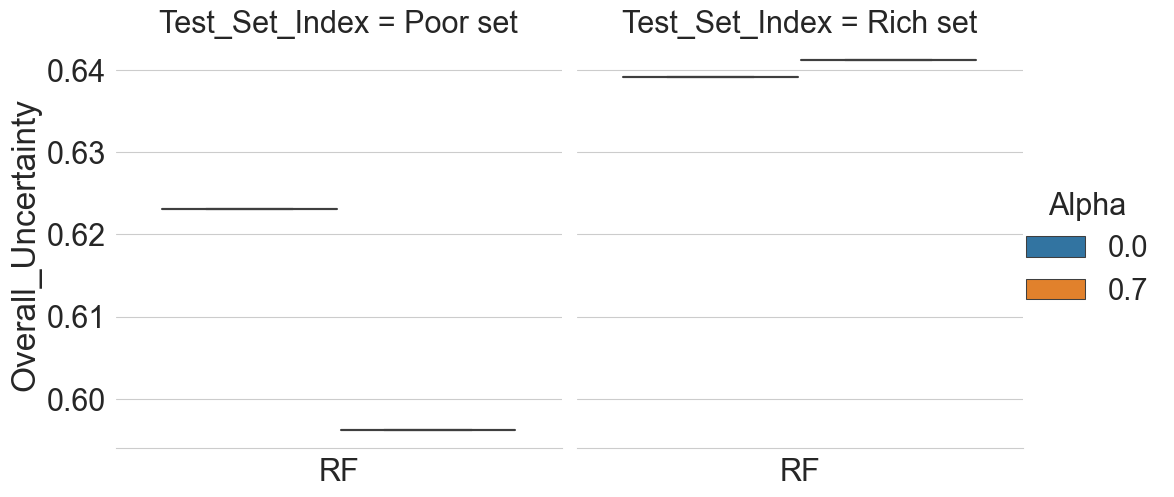

In [26]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Overall_Uncertainty',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

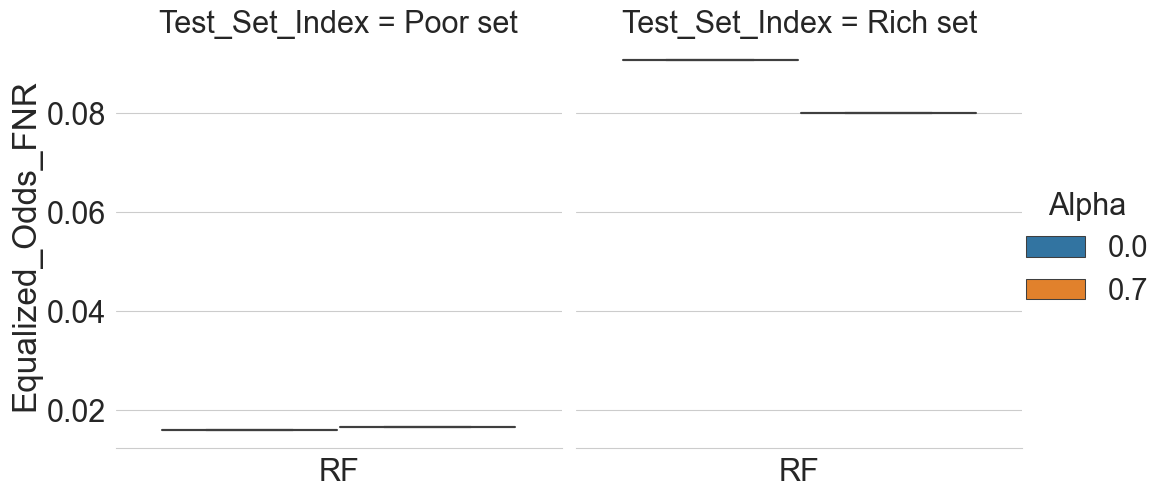

In [27]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FNR', group='SEX',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

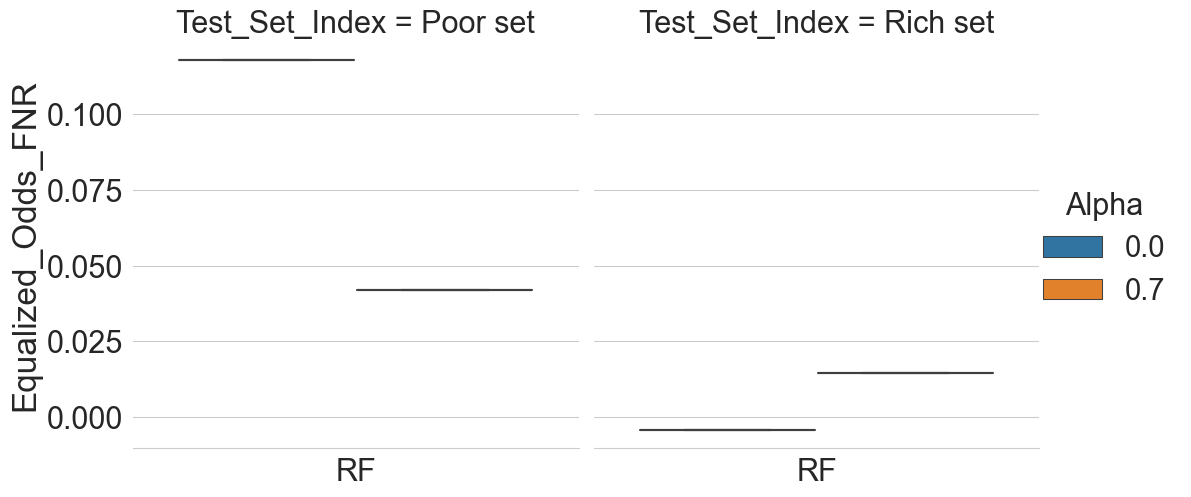

In [28]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FNR', group='RAC1P',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

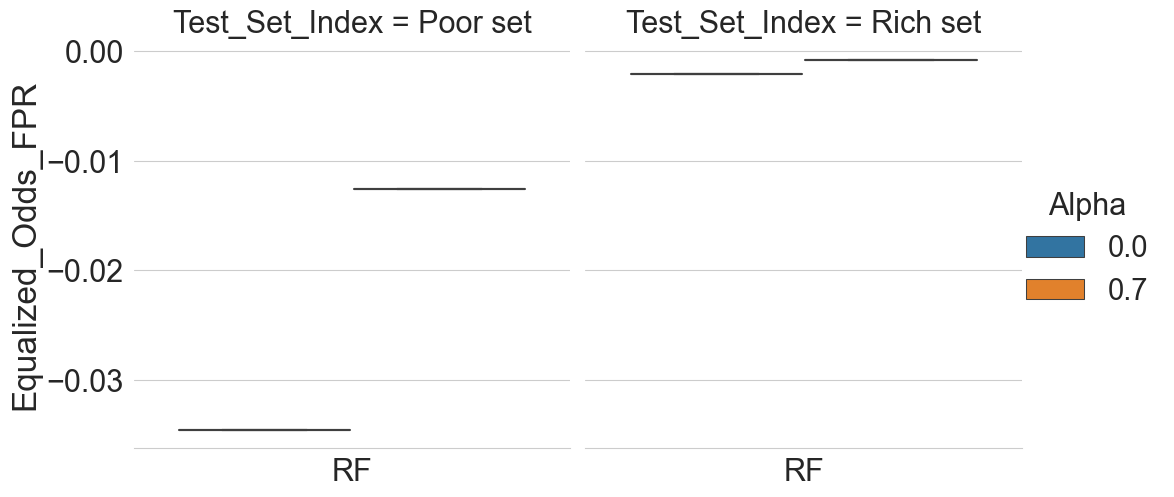

In [29]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FPR', group='RAC1P',
                                          vals_to_replace=new_vals_to_replace)